In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# from utils import *
%run utils-1D.py
plt.rcParams['text.usetex'] = True 

In [2]:

init_params={
    'v' : 2,                    # Wave speed
    'theta_resolution' : 1,     # degrees
    'tolerance' : 0.05,         # Detection threshold
    'r_s' :     50,                # r of source
    'theta_s' : np.deg2rad(60) ,      # theta of source
    'd': 20,       #rescale with r_s*     # radially symmetric receptor positions
    'r1_amp':15,                 # amplitude of outR1
    'r2_amp':15,                  # amplitude of outR2
    'r1_theta': 0,
    'r2_theta': np.pi,
    }
init_params.update({'R1cart':polar2cart(init_params['d'], init_params['r1_theta']),
                    'R2cart':polar2cart(-init_params['d'], init_params['r2_theta']),
                    'Scart': polar2cart(init_params['r_s'],init_params['r_s'] ),
                    })

time_prms = {
    'dt' : 0.001,                # Time step
    'tmax' : 100,              # Simulation duration
    'pulses' : 10,               # Period between source emissions
    'width' : 100,               # time width of pulse window
}
INeuron={
    'V0': -70,
    'Vq': -55,
    'w1': 5,
    'w2':5, 
    'tau':1,
    'rf': 10,
    'lag':300,
    'outAmp':20,
    'I1': 'outR1',
    'I2': 'outR2'
}
O1Neuron = {
    'id': 'O1',
    'V0': -70,
    'Vq': -55,
    'w1': .8,
    'w2': .8,
    'tau': 1, 
    'refr':300,
    'I1': 'outR1',
    'I2': 'outI',
    'outAmp': 20
    }
O2Neuron = {
    'id': 'O2',
    'V0': -70,
    'Vq': -55,
    'w1': .8,
    'w2': .8,
    'tau': 1, 
    'refr':300,
    'I1': 'outR2',
    'I2': 'outI',
    'outAmp': 20
    }

In [3]:
%run utils-1D.py

time = np.arange(0, time_prms['tmax'], time_prms['dt'])
emissionIdx, outS, startIdx = Source(time, time_prms)
dfS = pd.DataFrame({'time':time,
                    'S': outS})

dfR = ReceptorN(dfS, emissionIdx, init_params)
dfI, VdfI = InterN(dfR, INeuron,time_prms )

dfO1, VdfO1 = OuterN(dfI, VdfI, O1Neuron, time_prms)
dfO, VdfO = OuterN(dfO1, VdfO1, O2Neuron, time_prms)



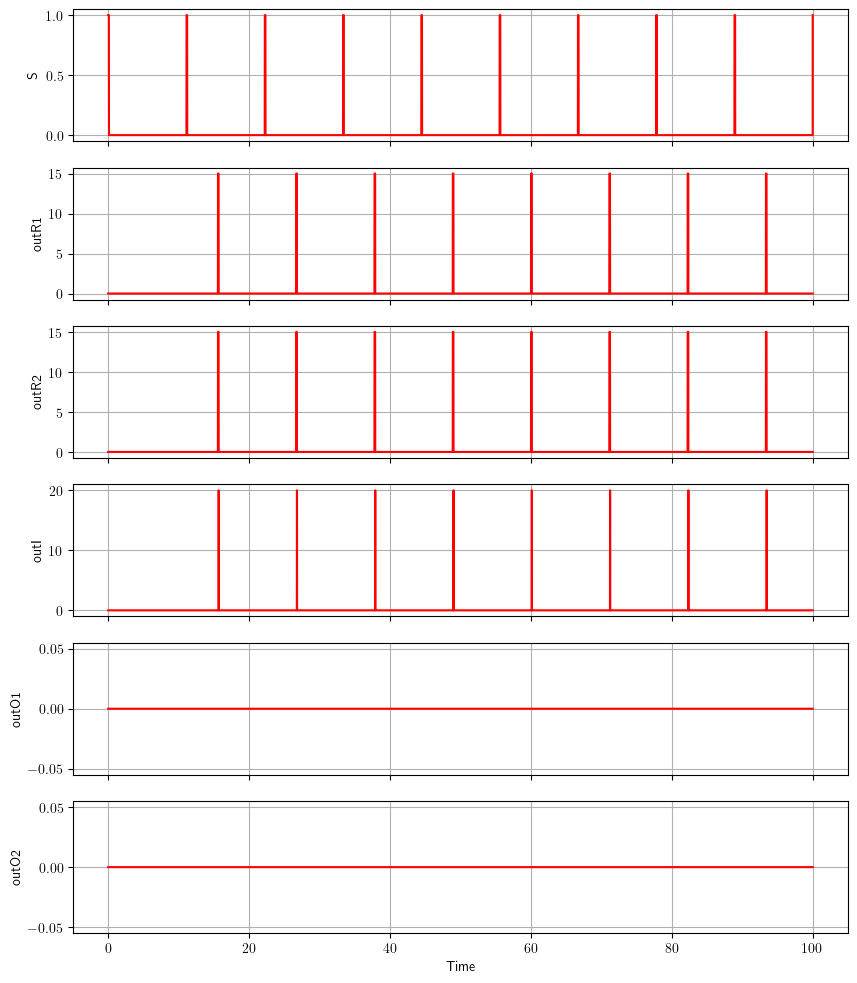

In [4]:
dfPlot(dfO)
# plt.xlim(2, 3)

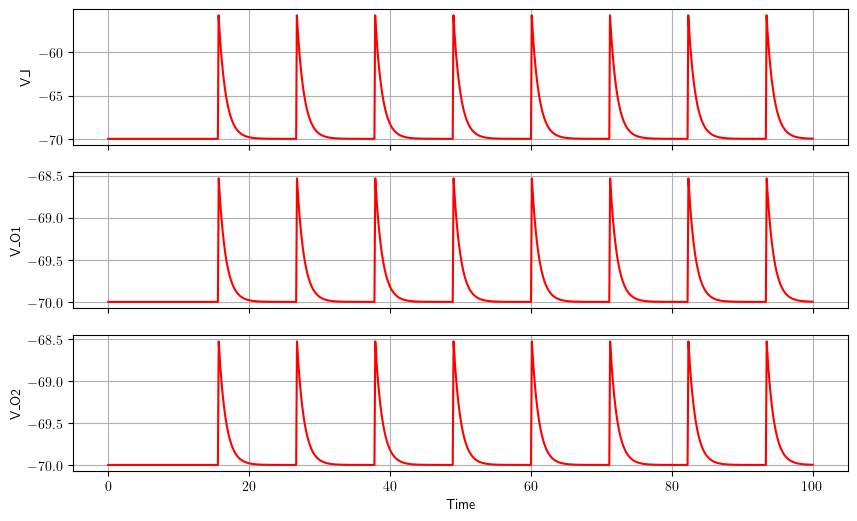

In [77]:
dfPlot(VdfO)